Validator 149.36.1.121 is available...
Validator 192.150.253.122 is not accessible...
Validator 165.227.153.108 is available...
Validator 34.147.54.95 is not accessible...
Validator 34.44.71.163 is not accessible...
Validator 64.226.93.21 is available...
Validator 172.93.55.221 is available...
Validator 34.31.27.55 is not accessible...
Validator 66.135.5.67 is not accessible...
Validator 161.97.131.133 is available...
Validator 5.161.242.50 is available...


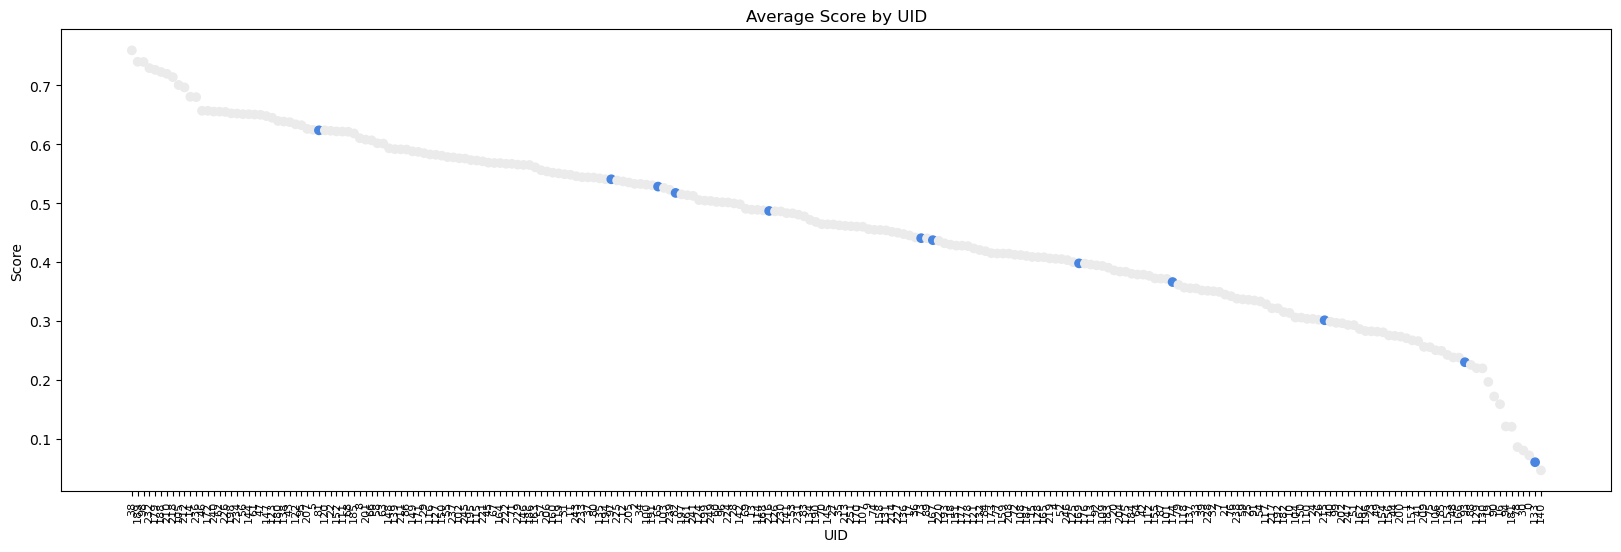

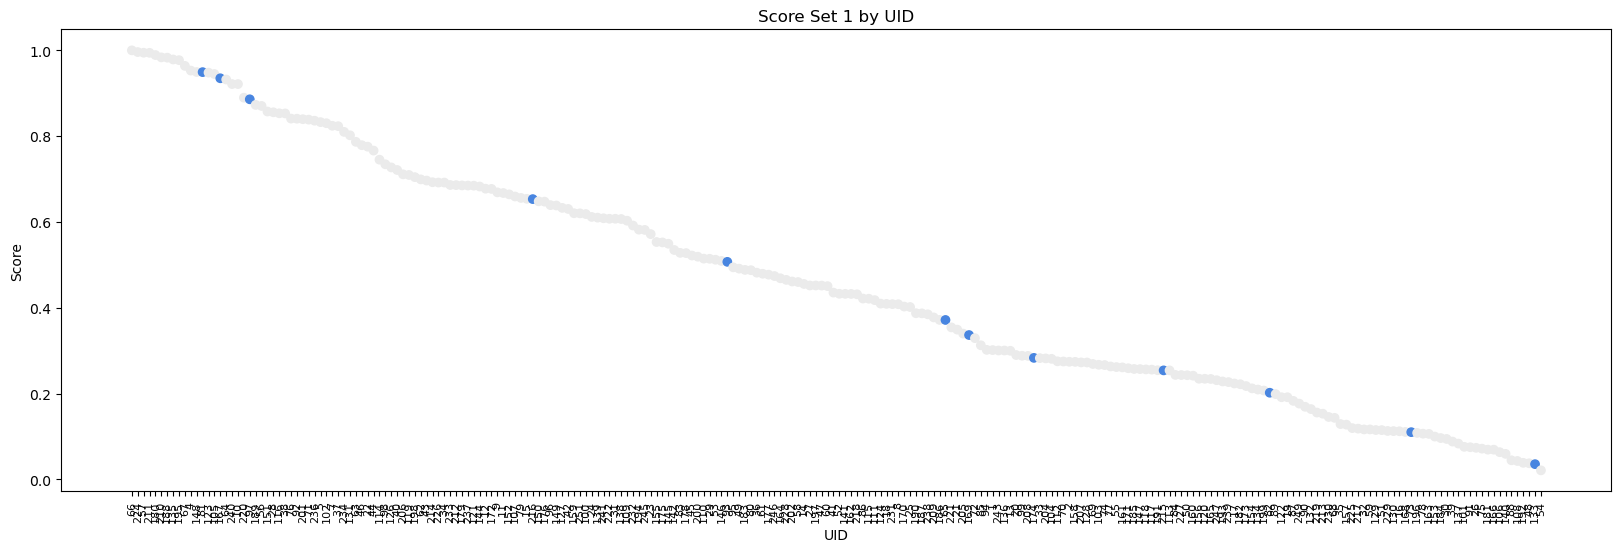

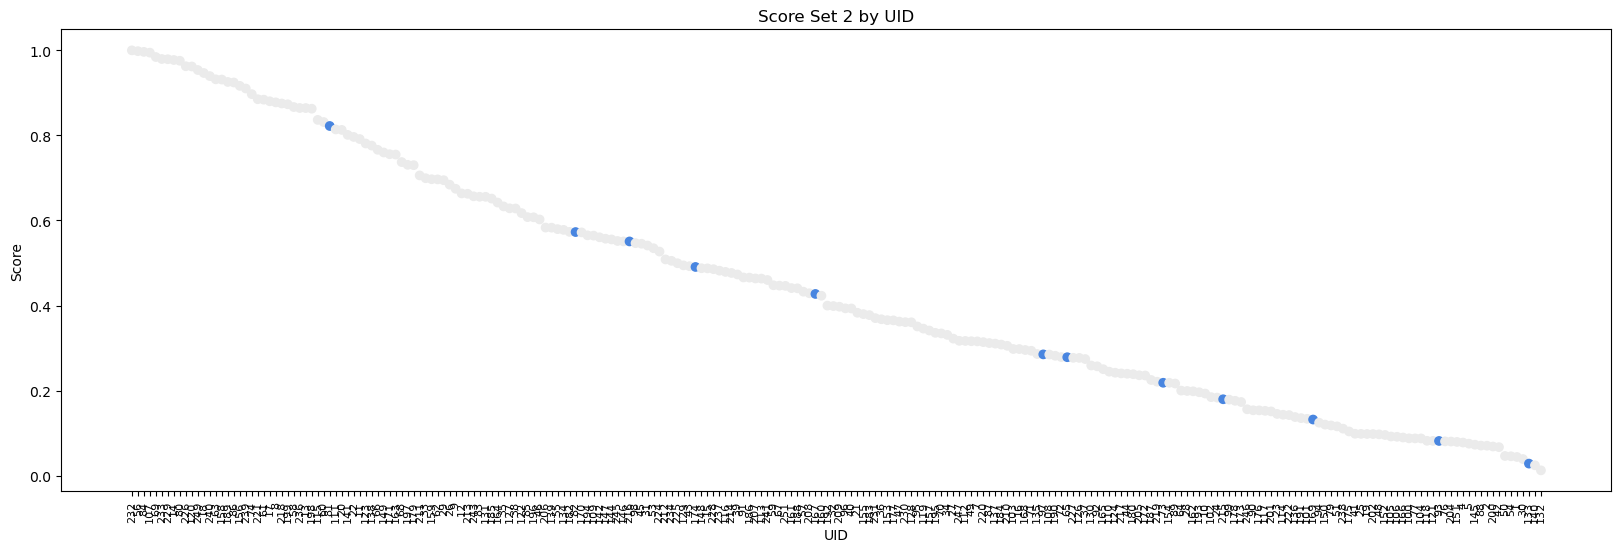

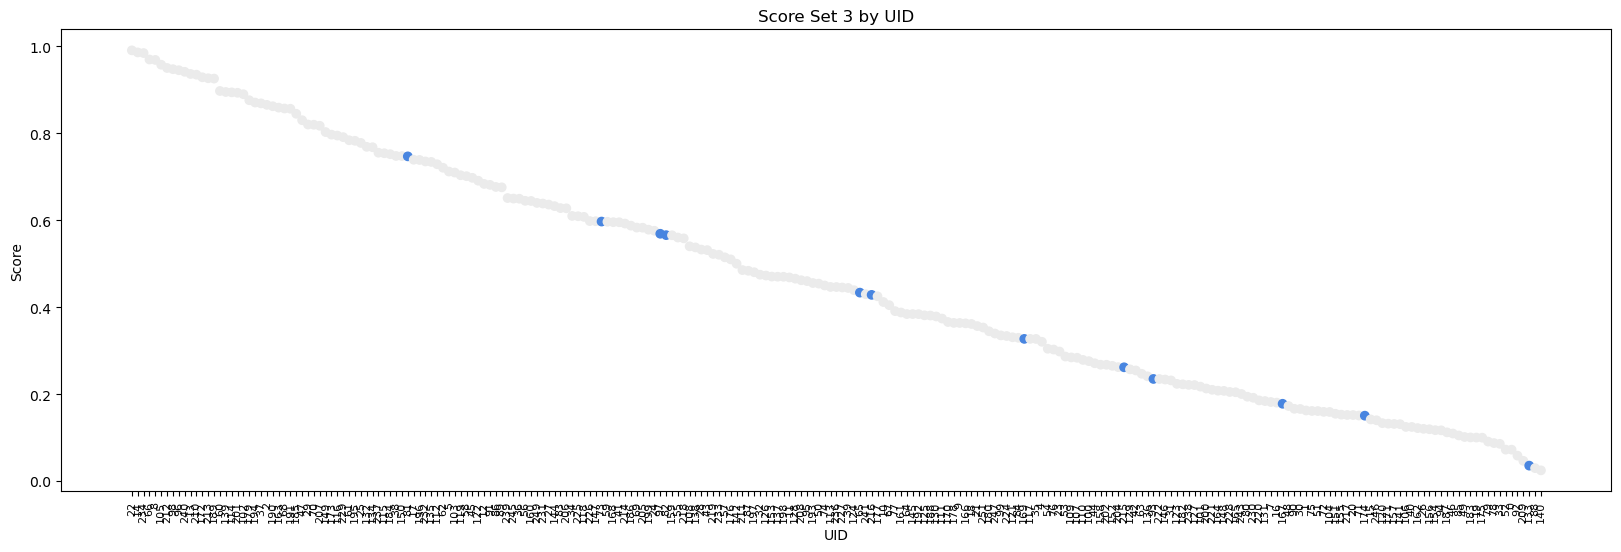

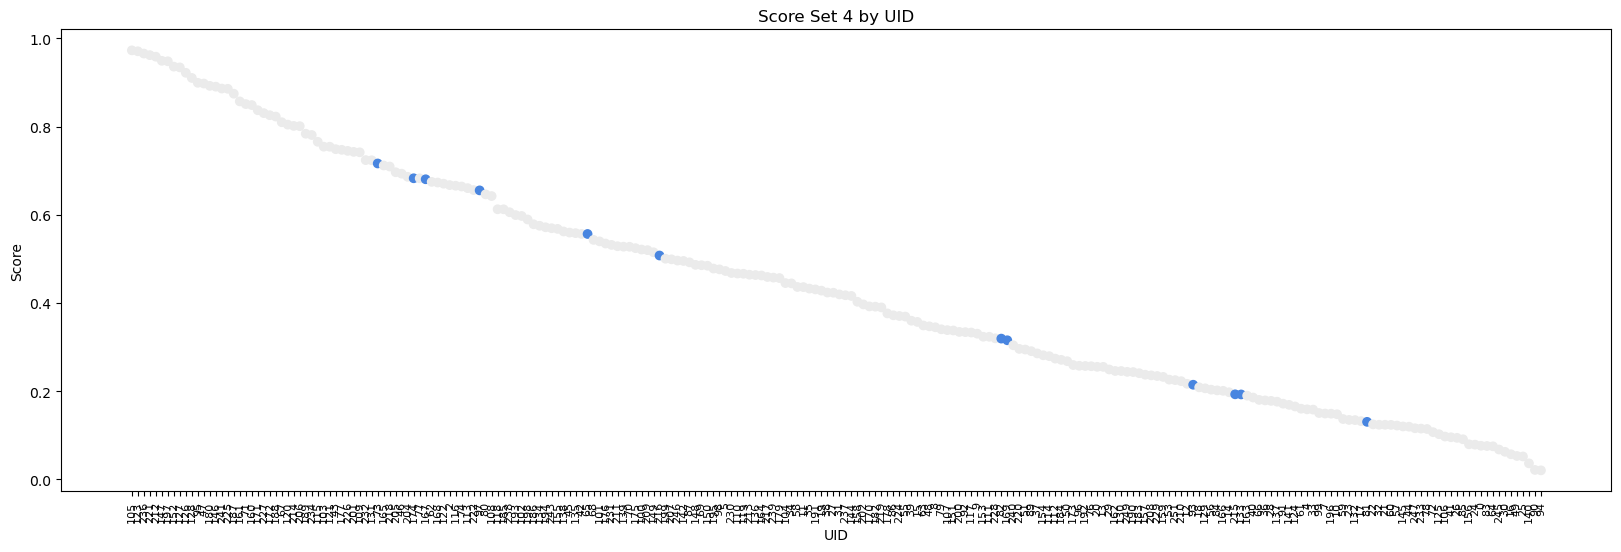

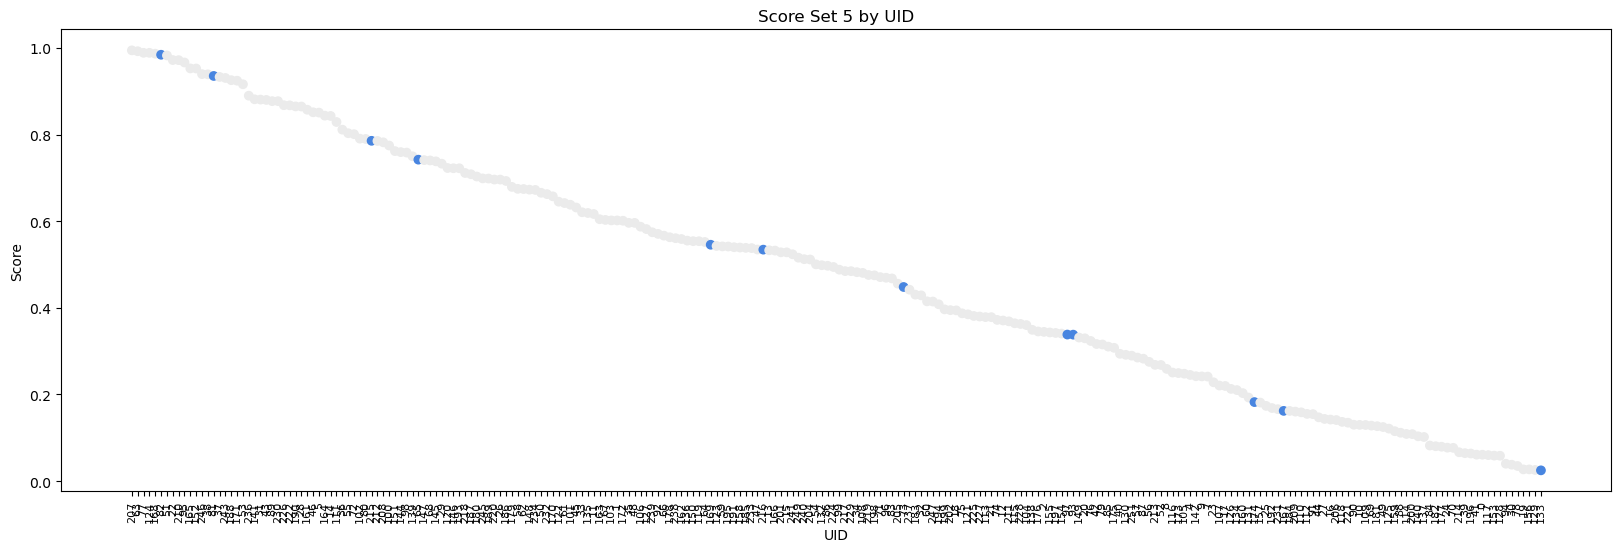

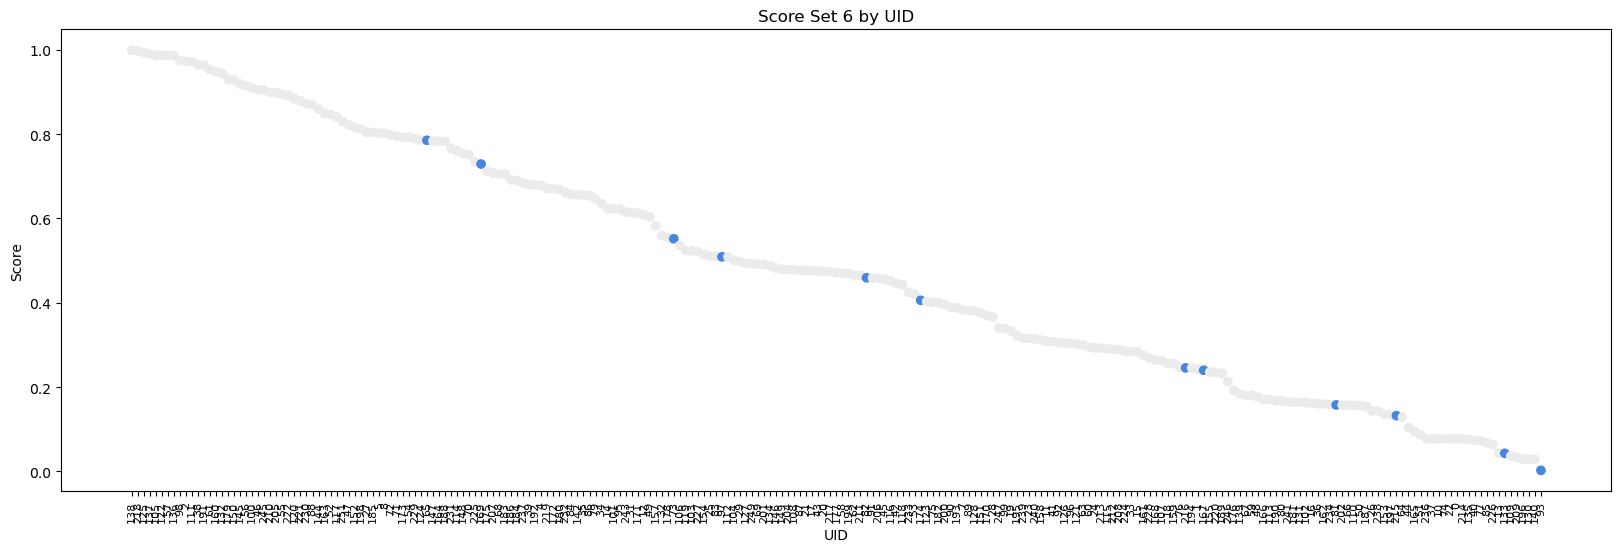

In [6]:
import matplotlib.pyplot as plt
import requests
import bittensor as bt
import pandas as pd

miners_to_highlight = ["23"]

# Connect to the mainnet bittensor netuid 42 and pull the metagraph of axons
subtensor = bt.subtensor(network="finney")
metagraph = subtensor.metagraph(netuid=42)
stakes = metagraph.S
axons = metagraph.axons
validator_axons = [axons[i] for i in range(len(axons)) if stakes[i] >= 1000]
validator_ips = [axon.ip for axon in validator_axons if axon.ip != '0.0.0.0']

healthy_validator_ips = []
for ip in validator_ips:
    try:
        response = requests.get(f"http://{ip}:8000/healthcheck", timeout=5)
        if response.ok:
            healthy_validator_ips.append(ip)
            print(f"Validator {ip} is available...")
    except requests.exceptions.RequestException as e:
        print(f"Validator {ip} is not accessible...")

# Fetch scores from healthy validators
all_scores = []
for ip in healthy_validator_ips:
    try:
        response = requests.get(f"http://{ip}:8000/scores", timeout=5)
        if response.ok:
            scores = response.json()
            all_scores.append(scores)
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch volumes from {ip}: {e}")



average_scores = {}
for response in all_scores:
    for i, data in enumerate(response):
        if data > 0:
            uid = str(i)
            if uid not in average_scores:
                average_scores[uid] = []
            average_scores[uid].append(data)

scores_df = [{"uid": uid, "score": sum(scores) / len(scores)} for uid, scores in average_scores.items()]
df = pd.DataFrame(scores_df)
df = df.sort_values(by='score', ascending=False)
colors = ['#4885e0' if uid in miners_to_highlight else '#ebebeb' for uid in df['uid']]
plt.figure(figsize=(20, 6))
plt.scatter(df['uid'], df['score'], c=colors)
plt.xlabel('UID')
plt.ylabel('Score')
plt.title('Average Score by UID')
plt.xticks(rotation=90, fontsize=8)
plt.show()

for idx, response in enumerate(all_scores):
    scores_df = [{"uid": str(i), "score": data} for i, data in enumerate(response) if data > 0]
    df = pd.DataFrame(scores_df)
    df = df.sort_values(by='score', ascending=False)
    colors = ['#4885e0' if uid in miners_to_highlight else '#ebebeb' for uid in df['uid']]
    plt.figure(figsize=(20, 6))
    plt.scatter(df['uid'], df['score'], c=colors)
    plt.xlabel('UID')
    plt.ylabel('Score')
    plt.title(f'Score Set {idx + 1} by UID')
    plt.xticks(rotation=90, fontsize=8)
    plt.show()





<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f017507a-86ad-40cb-8efa-5587c78ee158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>